## Predicting Insurance Claims filed by Travelling Agencies

In [1]:
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# import warnings
# from sklearn.exceptions import DataConversionWarning
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# from sklearn.exceptions import ConvergenceWarning
# warnings.filterwarnings("ignore", category=ConvergenceWarning)
# from sklearn.exceptions import FitFailedWarning
# warnings.filterwarnings("ignore", category=FitFailedWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df=pd.read_csv('travel insurance.csv',sep=',')
row,column=df.shape
print("The dataset has {} Rows and {} Columns".format(row,column))
print('')
cols=list(df.columns)
continous=list(set(df._get_numeric_data().columns)-{'Duration','Age'})
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)
# Duration and Age are categorical ( done in EDA part [Ayush_Project.ipynb] )
df_=df.copy()
df_['Gender']=df_['Gender'].fillna('N')

The dataset has 63326 Rows and 11 Columns

Columns :  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age']
Continous Variables   :  ['Net Sales', 'Commision (in value)']
Categorical Variables :  ['Destination', 'Agency', 'Distribution Channel', 'Gender', 'Product Name', 'Agency Type', 'Age', 'Duration', 'Claim']


In [5]:
a=list(df_['Destination'].unique())
aa=list(df_['Agency'].unique())

In [6]:
df_ = df_[df_.Age != 118]
df_ = df_[df_.Duration >=0]
df_.loc[df_['Net Sales'] == 0.0, 'Commision (in value)'] = 0
print("Now the dataset  has {} Rows and {} Columns".format(df_.shape[0],df_.shape[1]))
print("%d records deleted from the dataset"%(df.shape[0]-df_.shape[0]))
df_=df_.reset_index().drop(columns='index')
df1=df_.copy()

Now the dataset  has 62342 Rows and 11 Columns
984 records deleted from the dataset


In [7]:
b=list(df_['Destination'].unique())
bb=list(df_['Agency'].unique())

In [8]:
new=[]
for i in a :
  if(i not in list(b)):
    print(i)
    new.append(i)
for i in aa:
  if(i not in list(bb)):
    print(i)
    new.append(i)

KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF
TIBET
JWT


In [9]:
df.loc[df['Destination'].isin(new) ]#| df['Agency'].isin(new)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.1,NaN,118
56265,EPX,Travel Agency,Offline,2 way Comprehensive Plan,No,29,TIBET,24.0,0.0,NaN,118


In [10]:
# Label Encoding
le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 11 Columns


In [11]:
relation=dict()
for l in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  indx=[]
  for x in df_[l].unique():
    #print(x,' ',df_.index[df_[l] == x].tolist()[0])
    indx.append(df_.index[df_[l] == x].tolist()[0])
  dic=dict(zip(le_df.loc[indx][l].to_list(),df_.loc[indx][l].to_list()))
  relation[l]=dic
  print(dic)

{78: 'MALAYSIA', 4: 'AUSTRALIA', 61: 'ITALY', 138: 'UNITED STATES', 128: 'THAILAND', 95: 'NORWAY', 143: 'VIET NAM', 32: 'DENMARK', 117: 'SINGAPORE', 63: 'JAPAN', 137: 'UNITED KINGDOM', 57: 'INDONESIA', 56: 'INDIA', 26: 'CHINA', 41: 'FRANCE', 125: 'TAIWAN, PROVINCE OF CHINA', 101: 'PHILIPPINES', 87: 'MYANMAR', 53: 'HONG KONG', 67: 'KOREA, REPUBLIC OF', 136: 'UNITED ARAB EMIRATES', 88: 'NAMIBIA', 92: 'NEW ZEALAND', 28: 'COSTA RICA', 19: 'BRUNEI DARUSSALAM', 102: 'POLAND', 121: 'SPAIN', 31: 'CZECH REPUBLIC', 44: 'GERMANY', 122: 'SRI LANKA', 21: 'CAMBODIA', 5: 'AUSTRIA', 120: 'SOUTH AFRICA', 127: 'TANZANIA, UNITED REPUBLIC OF', 70: "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 89: 'NEPAL', 90: 'NETHERLANDS', 76: 'MACAO', 29: 'CROATIA', 40: 'FINLAND', 23: 'CANADA', 130: 'TUNISIA', 109: 'RUSSIAN FEDERATION', 46: 'GREECE', 11: 'BELGIUM', 59: 'IRELAND', 124: 'SWITZERLAND', 25: 'CHILE', 60: 'ISRAEL', 8: 'BANGLADESH', 55: 'ICELAND', 103: 'PORTUGAL', 108: 'ROMANIA', 66: 'KENYA', 43: 'GEORGIA', 131: 'TURKEY

In [12]:
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_.copy()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

One Hot Encoded dataset  has 62342 Rows and 199 Columns


In [13]:
# Function to print the result after the prediction 
def print_result(y_test,y_pred):
  print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
  print("Accuracy of Model      : ",accuracy_score(y_test, y_pred))
  print("Precision of Model     : ",precision_score(y_test, y_pred))
  print("Recall of Model        : " , recall_score(y_test, y_pred))
  print("F1 Score of Model      : " ,f1_score(y_test, y_pred))
  print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred))	
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

In [14]:
# Funtion to print the details after train-test split
def print_input(X_train, X_test, y_train, y_test):
  print("TRAIN(X_train) Feature set        : ",len(X_train))
  print("TRAIN(y_train) Label Feature set  : ",len(y_train))
  print("TEST (X_test)  Feature set        : ",len(X_test))
  print("TEST (y_test)  Label set          : ",len(y_test))
  print("-------For Training Set--------\n")
  print(y_train['Claim'].value_counts())
  l_1,l_2= y_train['Claim'].value_counts()
  print("Class Label 0 is : ",(l_1/y_train.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/y_train.shape[0])*100,"%")
  print("\n-------For Testing Set--------\n")
  print(y_test['Claim'].value_counts())
  l_1,l_2= y_test['Claim'].value_counts()
  print("Class Label 0 is : ",(l_1/y_test.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/y_test.shape[0])*100,"%")

In [15]:
# Function to balance the imbalanced classes 
def balance(X_train,y_train,typ,s=0.3):
  if(typ.lower() == 'ros'):
    rus=RandomOverSampler(random_state=21)
    x_res, y_res = rus.fit_sample(X_train, y_train)
    print('Dataset shape after Random Over Sampling', Counter(y_res))
    print('After ROS the number of Rows Training set has are  : ', x_res.shape[0])
  elif(typ.lower() == 'rus' ):
    ros=RandomUnderSampler(random_state=21)
    x_res, y_res = ros.fit_sample(X_train, y_train)
    print('Dataset shape after Random Under Sampling', Counter(y_res))
    print('After RUS the number of Rows Training set has are : ', x_res.shape[0])
  elif(typ.lower() == 'adasyn'):
    ada=ADASYN(random_state=21, sampling_strategy=s, n_jobs=-1)
    x_res, y_res = ada.fit_sample(X_train, y_train)
    print('Dataset shape after ADASYN', Counter(y_res))
    print('After ADASYN the number of Rows Training set has are : ', x_res.shape[0])
  elif(typ.lower() == 'smote'):
    smo=SMOTE(random_state=21, sampling_strategy=s, n_jobs=-1)
    x_rs, y_rs = smo.fit_sample(X_train, y_train)
    tom=TomekLinks(random_state=21)
    x_res, y_res = tom.fit_sample(x_rs,y_rs)
    print('Dataset shape after SMOTE + Tomek Links', Counter(y_res))
    print('After SMOTE Tomek the number of Rows Training set has are : ', x_res.shape[0])
  return x_res, y_res


In [16]:
# Function to plot the scatter plot of values it get by applying PCA
def plt_scatter(tmp_sample):
  plt.figure(figsize=(10,10))
  sns.scatterplot(x='Component 1',y='Component 2', hue='Label', data=tmp_sample)
  plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)


In [17]:
# Function to count the number of elements with Label 1 and Lable 0
def plt_print(temp):
  tmp_sample = temp.sample(frac = 0.10, random_state=21)
  tmp_sample = tmp_sample[tmp_sample['Component 1'] < 0.90 ]
  print(tmp_sample['Label'].value_counts())
  l_1,l_2= tmp_sample['Label'].value_counts()
  print("Class Label 0 is : ",(l_1/tmp_sample.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/tmp_sample.shape[0])*100,"%")
  print(" ")
  plt_scatter(tmp_sample)

In [18]:
# Function to plot the graph 
def plot_graph(X_train,y_train):
  pca=PCA(n_components=2) 
  dim=pca.fit_transform(X_train)
  scaler=MinMaxScaler()
  res=scaler.fit_transform(dim)
  temp= pd.DataFrame(res,columns=['Component 1', 'Component 2'])
  y_temp=y_train.copy()
  y_temp=y_temp.reset_index()
  temp['Label'] = y_temp['Claim']
  plt_print(temp)

In [19]:
# Function to plot the graph 
def plt_graph(X_train,y_train):
  pca=PCA(n_components=2) 
  dim=pca.fit_transform(X_train)
  scaler=MinMaxScaler()
  res=scaler.fit_transform(dim)
  temp= pd.DataFrame(res,columns=['Component 1', 'Component 2'])
  y_temp=y_train.copy()
  temp['Label'] = y_temp
  plt_print(temp)

In [20]:
# Function to print precision , recall, Accuracy and F1 score
def calc(TP,TN,FP,FN):
  if(TP==0):
    TP=0.00000000000000001
  if(FP==0):
    FP=0.00000000000000001
  if(FN==0):
    FN=0.00000000000000001
  conf_mat=[[TN,FP],[FN,TP]]
  precision=(TP/(TP+FP))
  recall= (TP/(TP+FN))
  f1=((2*recall*precision)/(recall+precision))
  accuracy=((TP+TN)/(TP+TN+FP+FN))
  TPR=(TP/(TP+FN))
  FPR=(FP/(FP+TN))
  print("Confusion Matrix       : \n" ,conf_mat[0],'\n',conf_mat[1])
  print("Accuracy of Model      : ", accuracy)
  print("Precision of Model     : ", precision)
  print("Recall of Model        : ", recall)
  print("F1 Score of Model      : ", f1)

In [21]:
# Function to compute the value of TP, TN, FP, FN
def comp(y_test,y_pred):
  TP=0
  TN=0
  FP=0
  FN=0
  for i in range(0,len(y_pred)):
    if (int(y_test.iloc[i]) == 1 and y_pred[i] == 1):
      TP+=1
    elif (int(y_test.iloc[i]) == 1 and y_pred[i] == 0 ):
      FN+=1
    elif (int(y_test.iloc[i]) == 0 and y_pred[i] == 1 ):
      FP+=1
    elif (int(y_test.iloc[i]) == 0 and y_pred[i] == 0 ):
      TN+=1
  calc(TP,TN,FP,FN)

In [22]:
# Funtion to get the predicted value via probability 
def thresh(y_thresh,val=0.5):
  y_pred=[]
  for i in range(0,len(y_thresh)):
    if(y_thresh[i][0] >= val):
      y_pred.append(0)
    else:
      y_pred.append(1)
  y_pred=np.array(y_pred)
  return y_pred


In [23]:
target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

# MODEL TRAINING

## Without HyperParameter Tuning

In [25]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)
X_u_train, y_u_train = balance(X_train, y_train.values.ravel(),'rus')
X_o_train, y_o_train = balance(X_train, y_train.values.ravel(),'ros')
X_s_train, y_s_train = balance(X_train, y_train.values.ravel(),'smote',0.5)
X_a_train, y_a_train = balance(X_train, y_train.values.ravel(),'adasyn',0.5)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 0 is :  98.52853109761314 %
Class Label 1 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 0 is :  98.53073270884127 %
Class Label 1 is :  1.4692672911587321 %
Dataset shape after Random Under Sampling Counter({0: 688, 1: 688})
After RUS the number of Rows Training set has are :  1376
Dataset shape after Random Over Sampling Counter({0: 46068, 1: 46068})
After ROS the number of Rows Training set has are  :  92136
Dataset shape after SMOTE + Tomek Links Counter({0: 45752, 1: 23034})
After SMOTE Tomek the number of Rows Training set has are :  68786
Dataset shape after ADASYN Counter({0: 46068, 1: 22899})
After ADASYN the number of Rows Training set has are 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
[0 0 0 ... 0 1 0]
Confusion Matrix       : 
 [[11313  4044]
 [   58   171]]
Accuracy of Model      :  0.7368150904658026
Precision of Model     :  0.040569395017793594
Recall of Model        :  0.7467248908296943
F1 Score of Model      :  0.07695769576957696
ROC_AUC score of Model :  0.7416961043326046


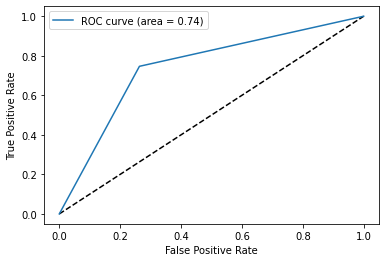

In [45]:
clf_dt = RandomForestClassifier(random_state=42)
clf_dt.fit(X_u_train, y_u_train)
y_pred = clf_dt.predict(X_test)
print(clf_dt)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15218   139]
 [  220     9]]
Accuracy of Model      :  0.9769665084049788
Precision of Model     :  0.060810810810810814
Recall of Model        :  0.039301310043668124
F1 Score of Model      :  0.04774535809018568
ROC_AUC score of Model :  0.515125031527662


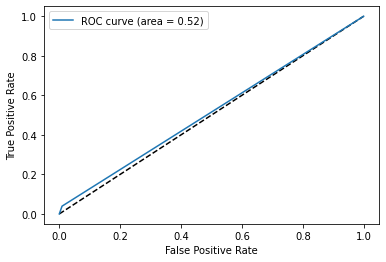

In [37]:
clf_dt = RandomForestClassifier(random_state=42)
clf_dt.fit(X_o_train, y_o_train)
y_pred = clf_dt.predict(X_test)
print(clf_dt)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15202   155]
 [  212    17]]
Accuracy of Model      :  0.9764532272552291
Precision of Model     :  0.09883720930232558
Recall of Model        :  0.07423580786026202
F1 Score of Model      :  0.08478802992518704
ROC_AUC score of Model :  0.5320713453574931


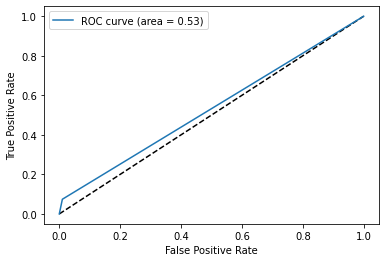

In [28]:
clf_dt = RandomForestClassifier(random_state=42)
clf_dt.fit(X_s_train, y_s_train)
y_pred = clf_dt.predict(X_test)
print(clf_dt)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15206   151]
 [  216    13]]
Accuracy of Model      :  0.9764532272552291
Precision of Model     :  0.07926829268292683
Recall of Model        :  0.056768558951965066
F1 Score of Model      :  0.06615776081424936
ROC_AUC score of Model :  0.5234679546729611


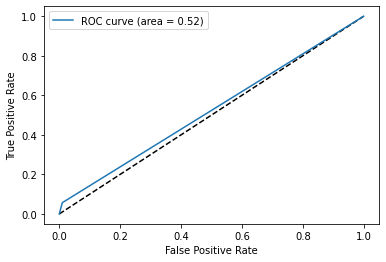

In [29]:
clf_dt = RandomForestClassifier(random_state=42)
clf_dt.fit(X_a_train, y_a_train)
y_pred = clf_dt.predict(X_test)
print(clf_dt)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

## With HyperParameter Tuning

In [ ]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[13053  2304]
 [   84   145]]
Accuracy of Model      :  0.846785576799692
Precision of Model     :  0.05920783993466721
Recall of Model        :  0.6331877729257642
F1 Score of Model      :  0.10828976848394326
ROC_AUC score of Model :  0.7415792351638003


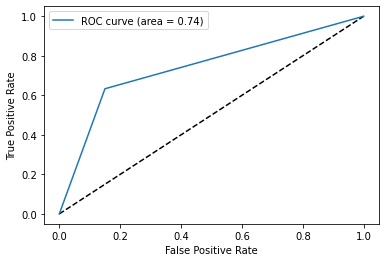

In [36]:
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_o_train, y_o_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[12298  3059]
 [   69   160]]
Accuracy of Model      :  0.7993070704478378
Precision of Model     :  0.049704877291084186
Recall of Model        :  0.6986899563318777
F1 Score of Model      :  0.09280742459396751
ROC_AUC score of Model :  0.7497487028517499


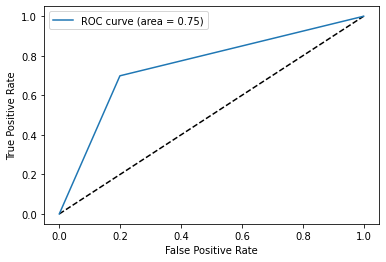

In [44]:
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_u_train, y_u_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

## Feature Selection 

In [41]:
# hyper parameter 
hyp1=pd.DataFrame({'Percent' : clf_best_dt.feature_importances_ , 'col' : ohe_df.columns}).sort_values(by='Percent',ascending=False)
hyp1

,Percent,col
153,0.128443,Agency_C2B
121,0.103110,Destination_SINGAPORE
2,0.100881,Commision (in value)
1,0.097221,Net Sales
170,0.074286,Gender_N
...,...,...
85,0.000000,Destination_MALTA
86,0.000000,Destination_MAURITIUS
87,0.000000,Destination_MEXICO
88,0.000000,"Destination_MOLDOVA, REPUBLIC OF"


In [42]:
# without hyper parameter
imp=pd.DataFrame({'Percent' : clf_dt.feature_importances_ , 'col' : ohe_df.columns}).sort_values(by='Percent',ascending=False)
imp

,Percent,col
0,0.229800,Duration
1,0.155975,Net Sales
3,0.147393,Age
2,0.097487,Commision (in value)
153,0.042200,Agency_C2B
...,...,...
115,0.000000,Destination_SAMOA
114,0.000000,Destination_RWANDA
13,0.000000,Destination_BARBADOS
51,0.000000,Destination_GUADELOUPE


## Threshold

In [47]:
x=np.linspace(0.5,0.95,10)
x

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [51]:
y_prob_hyp = clf_best_dt.predict_proba(X_test)
y_prob_hyp

array([[0.68992378, 0.31007622],
       [0.75630857, 0.24369143],
       [0.71136126, 0.28863874],
       ...,
       [0.74311314, 0.25688686],
       [0.17151698, 0.82848302],
       [0.81312844, 0.18687156]])

In [52]:
for i in x:
  print("\n Threshold => ",i,'\n')
  comp(y_test,thresh(y_prob_hyp,i))


 Threshold =>  0.5 

Confusion Matrix       : 
 [12298, 3059] 
 [69, 160]
Accuracy of Model      :  0.7993070704478378
Precision of Model     :  0.049704877291084186
Recall of Model        :  0.6986899563318777
F1 Score of Model      :  0.09280742459396751

 Threshold =>  0.55 

Confusion Matrix       : 
 [11766, 3591] 
 [59, 170]
Accuracy of Model      :  0.765815475426665
Precision of Model     :  0.0452007444828503
Recall of Model        :  0.74235807860262
F1 Score of Model      :  0.08521303258145364

 Threshold =>  0.6 

Confusion Matrix       : 
 [11173, 4184] 
 [49, 180]
Accuracy of Model      :  0.7284101116386501
Precision of Model     :  0.04124656278643447
Recall of Model        :  0.7860262008733624
F1 Score of Model      :  0.07838014369693012

 Threshold =>  0.65 

Confusion Matrix       : 
 [10404, 4953] 
 [40, 189]
Accuracy of Model      :  0.6796484024124214
Precision of Model     :  0.0367561260210035
Recall of Model        :  0.8253275109170306
F1 Score of Model   

In [53]:
y_prob=clf_dt.predict_proba(X_test)
y_prob

array([[0.63      , 0.37      ],
       [0.91      , 0.09      ],
       [0.94666667, 0.05333333],
       ...,
       [0.84      , 0.16      ],
       [0.23      , 0.77      ],
       [0.9       , 0.1       ]])

In [54]:
for i in x:
  print("\n Threshold => ",i,'\n')
  comp(y_test,thresh(y_prob_hyp,i))


 Threshold =>  0.5 

Confusion Matrix       : 
 [12298, 3059] 
 [69, 160]
Accuracy of Model      :  0.7993070704478378
Precision of Model     :  0.049704877291084186
Recall of Model        :  0.6986899563318777
F1 Score of Model      :  0.09280742459396751

 Threshold =>  0.55 

Confusion Matrix       : 
 [11766, 3591] 
 [59, 170]
Accuracy of Model      :  0.765815475426665
Precision of Model     :  0.0452007444828503
Recall of Model        :  0.74235807860262
F1 Score of Model      :  0.08521303258145364

 Threshold =>  0.6 

Confusion Matrix       : 
 [11173, 4184] 
 [49, 180]
Accuracy of Model      :  0.7284101116386501
Precision of Model     :  0.04124656278643447
Recall of Model        :  0.7860262008733624
F1 Score of Model      :  0.07838014369693012

 Threshold =>  0.65 

Confusion Matrix       : 
 [10404, 4953] 
 [40, 189]
Accuracy of Model      :  0.6796484024124214
Precision of Model     :  0.0367561260210035
Recall of Model        :  0.8253275109170306
F1 Score of Model   

## Comparing Feature selction for each TP, TN, FP, FN

### hyperparameter tuning

In [56]:
l=hyp1['col'][0:19].to_list()

In [57]:
l

['Agency_C2B',
 'Destination_SINGAPORE',
 'Commision (in value)',
 'Net Sales',
 'Gender_N',
 'Duration',
 'Agency Type_Travel Agency',
 'Agency_EPX',
 'Product Name_Cancellation Plan',
 'Agency Type_Airlines',
 'Age',
 'Product Name_2 way Comprehensive Plan',
 'Agency_JZI',
 'Product Name_Bronze Plan',
 'Product Name_Basic Plan',
 'Gender_F',
 'Gender_M',
 'Agency_LWC',
 'Product Name_Silver Plan']

In [58]:
new_ohe=ohe_df[l]

In [59]:
new_ohe

,Agency_C2B,Destination_SINGAPORE,Commision (in value),Net Sales,Gender_N,Duration,Agency Type_Travel Agency,Agency_EPX,Product Name_Cancellation Plan,Agency Type_Airlines,Age,Product Name_2 way Comprehensive Plan,Agency_JZI,Product Name_Bronze Plan,Product Name_Basic Plan,Gender_F,Gender_M,Agency_LWC,Product Name_Silver Plan
0,0,0,9.57,-29.0,0,186,1,0,0,0,81,0,0,0,0,1,0,0,0
1,0,0,9.57,-29.0,0,186,1,0,0,0,71,0,0,0,0,1,0,0,0
2,0,0,29.70,-49.5,1,65,1,0,0,0,32,0,0,0,0,0,0,0,0
3,0,0,23.76,-39.6,1,60,1,0,0,0,32,0,0,0,0,0,0,0,0
4,0,0,11.88,-19.8,1,79,1,0,0,0,41,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62337,0,0,12.25,35.0,0,111,0,0,0,1,31,0,1,0,1,0,1,0,0
62338,0,0,14.00,40.0,0,58,0,0,0,1,40,0,1,0,1,1,0,0,0
62339,0,0,6.30,18.0,0,2,0,0,0,1,57,0,1,0,1,0,1,0,0
62340,0,0,6.30,18.0,0,3,0,0,0,1,63,0,1,0,1,0,1,0,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(new_ohe,target,test_size = 0.25, random_state = 21, stratify = target)
X_u_train, y_u_train = balance(X_train, y_train.values.ravel(),'rus')

Dataset shape after Random Under Sampling Counter({0: 688, 1: 688})
After RUS the number of Rows Training set has are :  1376


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[12121  3236]
 [   61   168]]
Accuracy of Model      :  0.7884640061593738
Precision of Model     :  0.04935370152761457
Recall of Model        :  0.7336244541484717
F1 Score of Model      :  0.09248554913294797
ROC_AUC score of Model :  0.7614531074545184


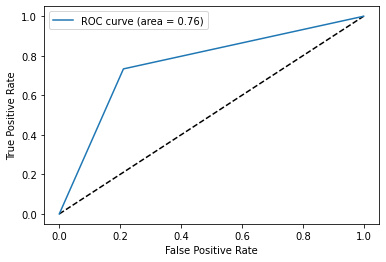

In [61]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_u_train, y_u_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

In [ ]:
'''
Before Feature selection 
Confusion Matrix       : 
 [[12298  3059]
 [   69   160]]

After Feature Selection 
Confusion Matrix       : 
 [[12121  3236]
 [   61   168]]
'''


### without hyperparameter tuning 

In [62]:
l2=imp['col'][0:19].to_list()
l2

['Duration',
 'Net Sales',
 'Age',
 'Commision (in value)',
 'Agency_C2B',
 'Destination_SINGAPORE',
 'Gender_N',
 'Product Name_Cancellation Plan',
 'Agency_EPX',
 'Agency Type_Travel Agency',
 'Product Name_2 way Comprehensive Plan',
 'Gender_F',
 'Agency_JZI',
 'Agency Type_Airlines',
 'Product Name_Basic Plan',
 'Product Name_Bronze Plan',
 'Destination_THAILAND',
 'Destination_MALAYSIA',
 'Product Name_Annual Silver Plan']

In [63]:
new_ohe2=ohe_df[l]
new_ohe2.head()

,Agency_C2B,Destination_SINGAPORE,Commision (in value),Net Sales,Gender_N,Duration,Agency Type_Travel Agency,Agency_EPX,Product Name_Cancellation Plan,Agency Type_Airlines,Age,Product Name_2 way Comprehensive Plan,Agency_JZI,Product Name_Bronze Plan,Product Name_Basic Plan,Gender_F,Gender_M,Agency_LWC,Product Name_Silver Plan
0,0,0,9.57,-29.0,0,186,1,0,0,0,81,0,0,0,0,1,0,0,0
1,0,0,9.57,-29.0,0,186,1,0,0,0,71,0,0,0,0,1,0,0,0
2,0,0,29.70,-49.5,1,65,1,0,0,0,32,0,0,0,0,0,0,0,0
3,0,0,23.76,-39.6,1,60,1,0,0,0,32,0,0,0,0,0,0,0,0
4,0,0,11.88,-19.8,1,79,1,0,0,0,41,0,0,0,0,0,0,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(new_ohe2,target,test_size = 0.25, random_state = 21, stratify = target)
X_u_train, y_u_train = balance(X_train, y_train.values.ravel(),'rus')

Dataset shape after Random Under Sampling Counter({0: 688, 1: 688})
After RUS the number of Rows Training set has are :  1376


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
[0 0 0 ... 0 1 0]
Confusion Matrix       : 
 [[11073  4284]
 [   61   168]]
Accuracy of Model      :  0.7212241755421532
Precision of Model     :  0.03773584905660377
Recall of Model        :  0.7336244541484717
F1 Score of Model      :  0.0717795342875454
ROC_AUC score of Model :  0.7273318598150055


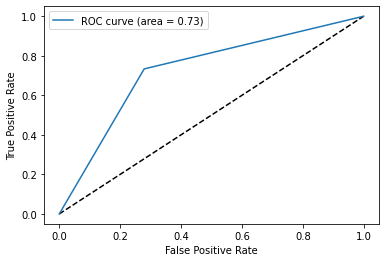

In [65]:
clf_dt = RandomForestClassifier(random_state=42)
clf_dt.fit(X_u_train, y_u_train)
y_pred = clf_dt.predict(X_test)
print(clf_dt)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

In [ ]:
'''
Before feature slection 
Confusion Matrix       : 
 [[11313  4044]
 [   58   171]] 

After feature selection 
Confusion Matrix       : 
 [[11073  4284]
 [   61   168]]

 
'''

In [55]:
for i in range(0,int((10/199)*100)):
  print(aa[i])

0.1899969893841905
0.16455821381903615
0.12841578923148111
0.08797555402764885
0.05426085473635304
